# Proyecto Ciencia de Datos
## Métodos de clústering para series de tiempo
### Orlando Uc

In [4]:
#se cargan los datos como un dataframe
import pandas as pd 
df = pd.read_csv("IPC_componentes_nonames.csv",header=None)
df.head() 

,0,1,2,3,4,5,6,7,8,9,...,349,350,351,352,353,354,355,356,357,358
0,29.01,29.47,28.67,29.24,28.93,28.51,28.30,29.23,29.52,29.86,...,14.79,15.28,14.95,15.20,15.72,17.02,18.04,17.57,18.12,19.20
1,27.49,27.45,27.75,27.25,27.58,27.29,26.05,26.54,26.89,26.67,...,31.43,31.06,30.53,30.29,29.91,30.00,31.04,30.42,30.83,31.20
2,221.55,222.01,222.99,224.20,224.56,222.58,224.84,224.95,224.62,224.97,...,226.55,227.77,223.71,220.08,230.69,231.84,221.63,222.97,221.98,222.96
3,49.72,48.75,49.66,49.84,50.52,49.88,48.92,48.11,49.42,49.76,...,56.17,56.63,55.86,55.35,56.65,55.36,55.01,54.94,55.36,57.30
4,34.37,34.84,35.67,36.04,36.85,37.20,36.75,37.01,36.93,37.14,...,42.71,42.76,42.67,42.49,42.92,43.39,43.77,42.61,43.55,45.04


In [9]:
#clave en pizarra de la BMV de cada empresa
nombres = np.array(['GFINBURO','VESTA','GRUMAB','WALMEX','BOLSAA', 'PEOLES', \
                    'GFNORTEO','AC','PINFRA','IENOVA','ALSEA','OMAB','CUERVO', \
                    'AMXL','ALFAA','BIMBOA','LIVEPOLC1','ASURB','BSMXB', \
                    'BBAJIOO','LABB','GMEXICOB','CEMEXCPO','ORBIA','GCARSOA1', \
                    'KIMBERA','ELEKTRA','Q','GAPB','KOFUBL','GENTERA','MEGACPO',\
                    'TELEVISACPO','FEMSAUBD','RA'])

In [5]:
#se convierte el df a una lista de listas por el formato que requiere tslearn
from tslearn.utils import to_time_series_dataset
list_ts = df.values.tolist()
formatted_ts = to_time_series_dataset(list_ts)
print(formatted_ts.shape)

(35, 359, 1)


In [6]:
#se cargan los modulos necesarios
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
import numpy as np 
from tslearn.clustering import GlobalAlignmentKernelKMeans
from tslearn.metrics import sigma_gak

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)


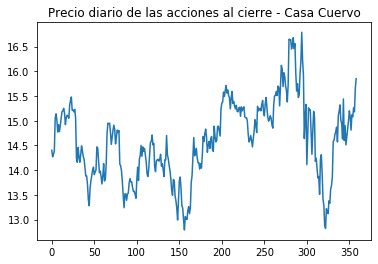

In [7]:
#Ejemplo de la serie de tiempo del precio diario de las acciones al cierre de Casa Cuervo
#del 1/enero/2019 al 8/mayo/2020
plt.title("Precio diario de las acciones al cierre - Casa Cuervo")
plt.plot(formatted_ts[13])

In [8]:
#Estandarizacion de las series 
series = TimeSeriesScalerMeanVariance().fit_transform(formatted_ts)

# Euclidean k-means 

Euclidean k-means


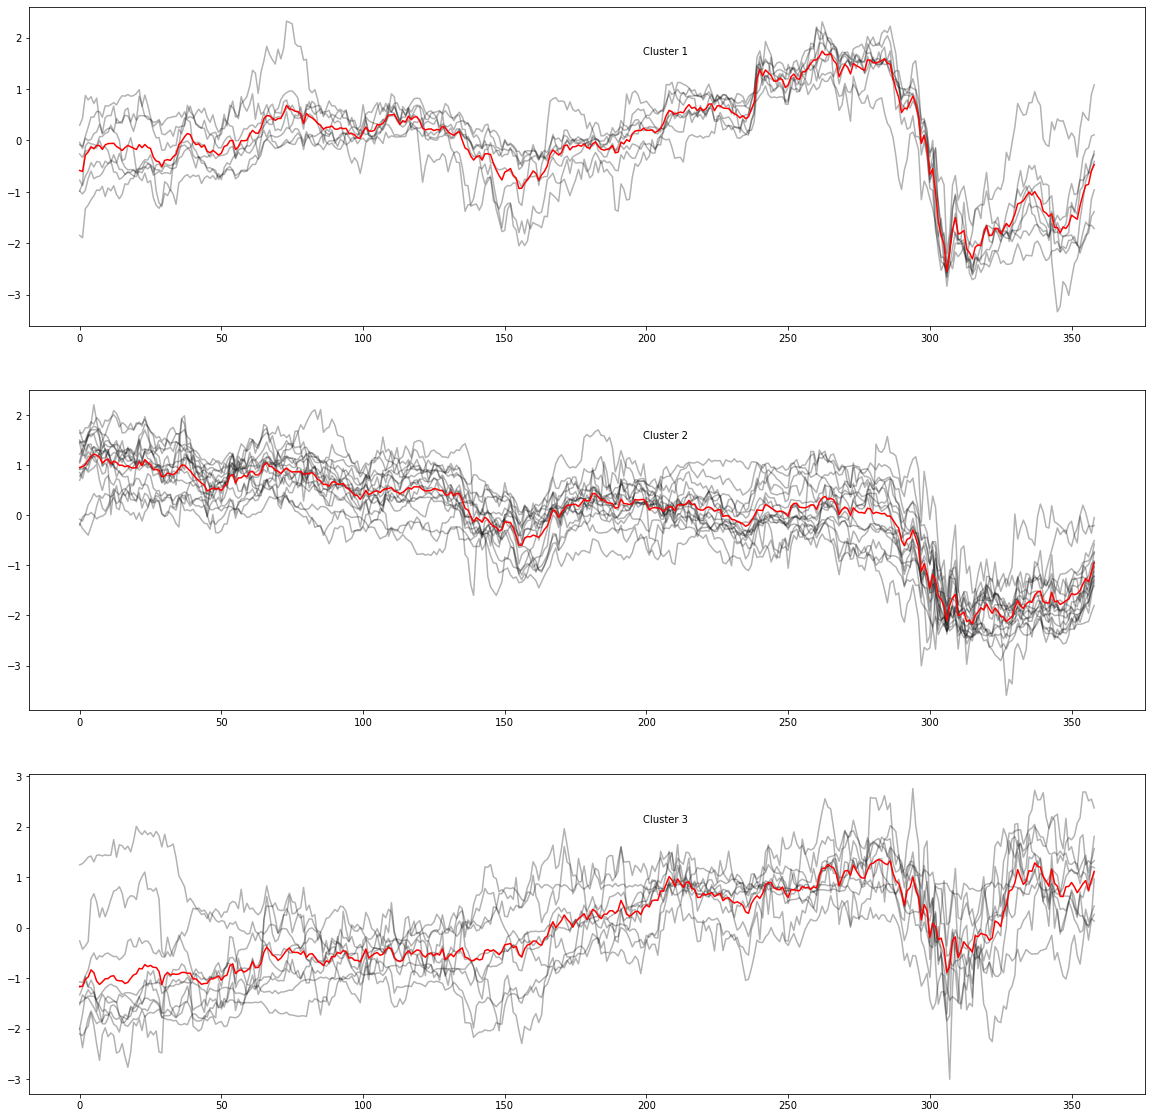

In [77]:
#Euclidean k-means
k=3 #numero de clusters
seed=10 #semilla

#se imprime en la salida el método aplicado
print("Euclidean k-means")

#parametros
euc_km = TimeSeriesKMeans(n_clusters=k,
                          metric='euclidean',
                          n_jobs=-1,
                          random_state=seed)
#asuste de los Euclidean k-means
y_pred = euc_km.fit_predict(series) 

#se cambia el tamaño de la figura
fig = plt.figure(figsize=(20, 20))
#ciclo que grafica cada cluster
for k_i in range(k):
    #se grafica cada cluster como parte de un subplot
    ax = plt.subplot(k,1, k_i + 1)
    #grafico de las series del i-esimo cluster
    for x_i in series[y_pred == k_i]: 
        plt.plot(x_i.ravel(), alpha=.3, color='k')  
    #grafico de los centroides de los clusters
    plt.plot(euc_km.cluster_centers_[k_i].ravel(), "r-")
    #se agregan los nombres de cada cluster
    plt.text(0.55, 0.85,'Cluster %d' % (k_i + 1), transform=plt.gca().transAxes)

In [78]:
#se guardan las etiquetas de los clusters
euc_km_etiquetas = euc_km.labels_
#se guarda la informacion de las claves y las etiquetas en un dataframe
euc_km_dic = {'Clave': nombres, 'Cluster': euc_km_etiquetas+1}
euc_km_tabla = pd.DataFrame(data = euc_km_dic)

In [79]:
#implementacion en HTML para imprimir varias tablas juntas
from IPython.core.display import HTML
def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [80]:
#Resultado final de los euclidean k-means
print("Euclidean k-means clusters")
multi_table([euc_km_tabla[euc_km_tabla.Cluster == 1],
            euc_km_tabla[euc_km_tabla.Cluster == 2],
            euc_km_tabla[euc_km_tabla.Cluster == 3]])

Euclidean k-means clusters


,Clave,Cluster
8,PINFRA,1
9,IENOVA,1
11,OMAB,1
17,ASURB,1
21,GMEXICOB,1
28,GAPB,1
30,GENTERA,1
34,RA,1
,Clave,Cluster
0,GFINBURO,2


# Soft DTW k-means 

Soft DTW k-means


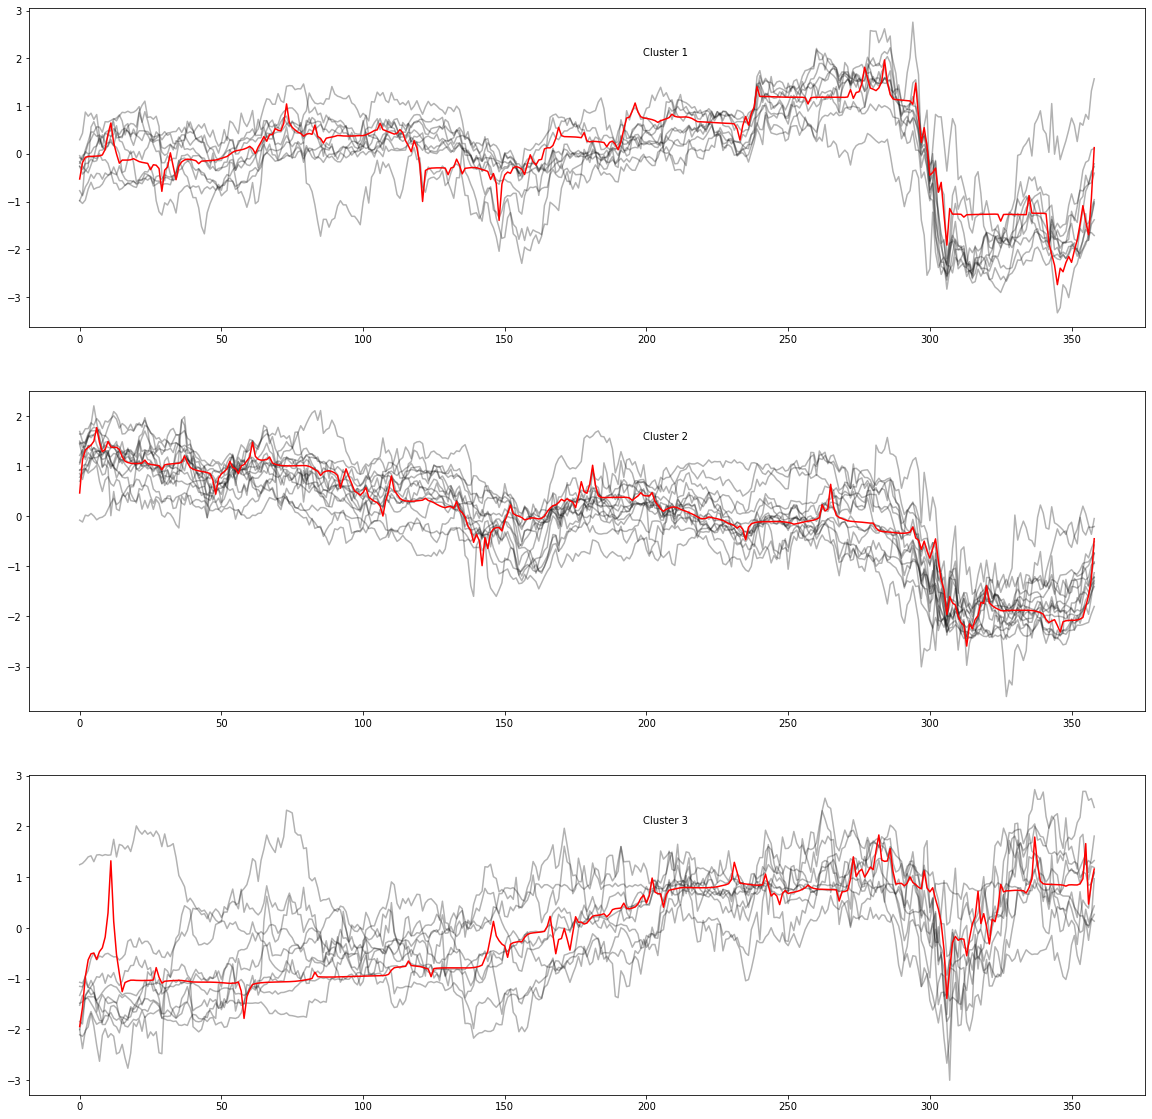

In [83]:
#Soft DTW k-means
k=3 #numero de clusters
seed=10 #semilla

#se imprime en la salida el método aplicado
print("Soft DTW k-means")

#parametros
soft_km = TimeSeriesKMeans(n_clusters=3,
                          metric="softdtw",
                          metric_params={"gamma": .01},
                          n_jobs=-1,
                          random_state=seed)

#asuste de DBA k-means
y_pred_soft_km = soft_km.fit_predict(series) 

#se cambia el tamaño de la figura
fig = plt.figure(figsize=(20, 20))
#ciclo que grafica cada cluster
for k_i in range(k):
    #se grafica cada cluster como parte de un subplot
    ax = plt.subplot(k,1, k_i + 1)
    #grafico de las series del i-esimo cluster
    for x_i in series[y_pred_soft_km == k_i]: 
        plt.plot(x_i.ravel(), alpha=.3, color='k')  
    #grafico de los centroides de los clusters
    plt.plot(soft_km.cluster_centers_[k_i].ravel(), "r-")
    #se agregan los nombres de cada cluster
    plt.text(0.55, 0.85,'Cluster %d' % (k_i + 1), transform=plt.gca().transAxes)

In [84]:
#se guardan las etiquetas de los clusters
soft_km_etiquetas = soft_km.labels_
#se guarda la informacion de las claves y las etiquetas en un dataframe
soft_km_dic = {'Clave': nombres, 'Cluster': soft_km_etiquetas+1}
soft_km_tabla = pd.DataFrame(data = soft_km_dic)

In [85]:
#Resultado final Soft DTW k-means
print("Soft DTW k-means clusters")
multi_table([soft_km_tabla[soft_km_tabla.Cluster == 1],
            soft_km_tabla[soft_km_tabla.Cluster == 2],
            soft_km_tabla[soft_km_tabla.Cluster == 3]])

Soft DTW k-means clusters


,Clave,Cluster
6,GFNORTEO,1
8,PINFRA,1
9,IENOVA,1
11,OMAB,1
13,AMXL,1
17,ASURB,1
28,GAPB,1
30,GENTERA,1
33,FEMSAUBD,1
34,RA,1


# DBA k-means 

DBA k-means


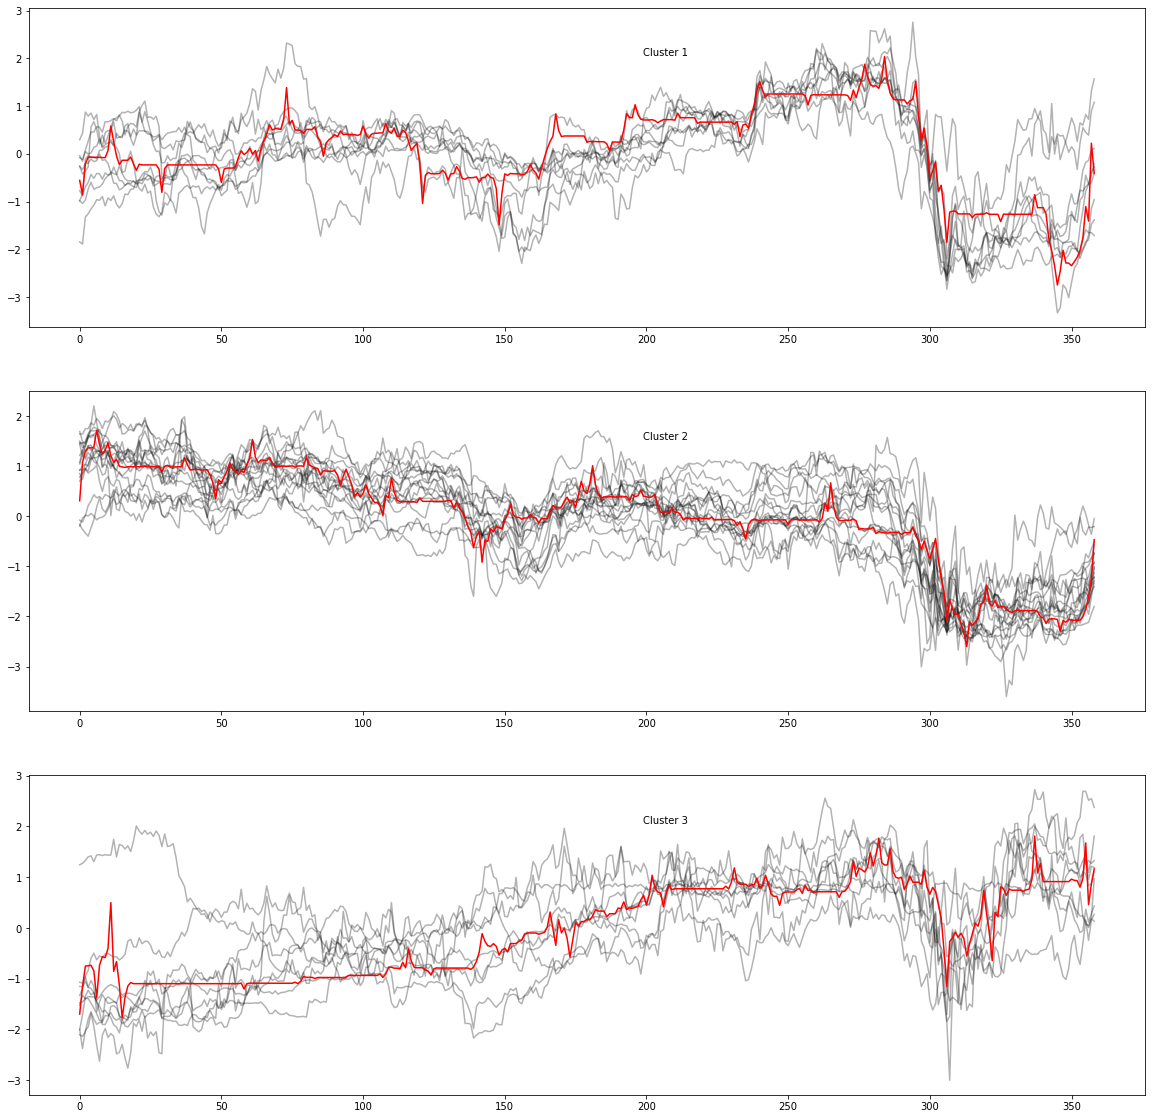

In [73]:
#DBA k-means
k=3 #numero de clusters
seed=10 #semilla

#se imprime en la salida el método aplicado
print("DBA k-means")

#parametros
dba_km = TimeSeriesKMeans(n_clusters=3,
                          metric="dtw",
                          max_iter_barycenter=10,
                          n_jobs=-1,
                          random_state=seed)

#asuste de DBA k-means
y_pred_dba = dba_km.fit_predict(series) 

#se cambia el tamaño de la figura
fig = plt.figure(figsize=(20, 20))
#ciclo que grafica cada cluster
for k_i in range(k):
    #se grafica cada cluster como parte de un subplot
    ax = plt.subplot(k,1, k_i + 1)
    #grafico de las series del i-esimo cluster
    for x_i in series[y_pred_dba == k_i]: 
        plt.plot(x_i.ravel(), alpha=.3, color='k')  
    #grafico de los centroides de los clusters
    plt.plot(dba_km.cluster_centers_[k_i].ravel(), "r-")
    #se agregan los nombres de cada cluster
    plt.text(0.55, 0.85,'Cluster %d' % (k_i + 1), transform=plt.gca().transAxes)

In [74]:
#se guardan las etiquetas de los clusters
dba_km_etiquetas = dba_km.labels_
#se guarda la informacion de las claves y las etiquetas en un dataframe
dba_km_dic = {'Clave': nombres, 'Cluster': dba_km_etiquetas+1}
dba_km_tabla = pd.DataFrame(data = dba_km_dic)

In [75]:
#Resultado final DBA k-means
print("DBA k-means clusters")
multi_table([dba_km_tabla[dba_km_tabla.Cluster == 1],
            dba_km_tabla[dba_km_tabla.Cluster == 2],
            dba_km_tabla[dba_km_tabla.Cluster == 3]])

DBA k-means clusters


,Clave,Cluster
8,PINFRA,1
9,IENOVA,1
11,OMAB,1
13,AMXL,1
17,ASURB,1
21,GMEXICOB,1
28,GAPB,1
30,GENTERA,1
34,RA,1
,Clave,Cluster


# GAK k-means

GAK k-means


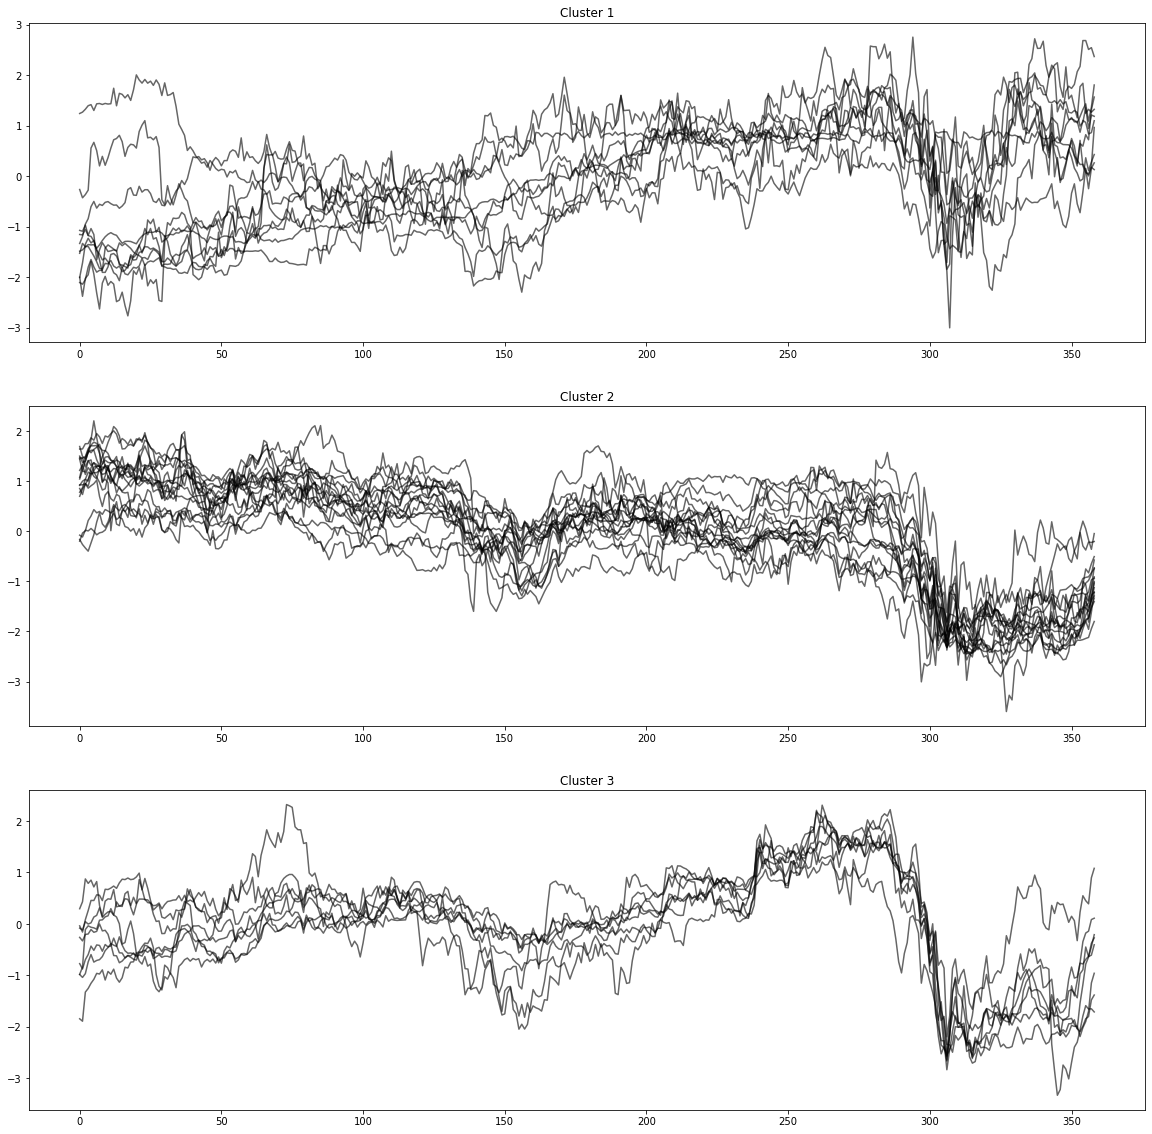

In [76]:
#Soft DTW k-means
k=3 #numero de clusters
seed=10 #semilla

#se imprime en la salida el método aplicado
print("GAK k-means")

#parametros
gak_km = GlobalAlignmentKernelKMeans(n_clusters=3,
                                     sigma=sigma_gak(series),
                                     n_init=10,
                                     random_state=seed,
                                     n_jobs=-1)
#ajuste de GAK k-means
y_pred_gak = gak_km.fit_predict(series)

#se fija el tamaño de la figura
fig = plt.figure(figsize=(20, 20))
#ciclo que grafica cada cluster
for k_i in range(k): 
    #se grafica cada cluster como parte de un subplot
    plt.subplot(k, 1, k_i+1) 
    for x_i in series[y_pred_gak== k_i]:
        plt.plot(x_i.ravel(), "k-", alpha=0.6)
    #se agregan los nombres de cada cluster
    plt.title("Cluster %d" % (k_i + 1))

In [65]:
#se guardan las etiquetas de los clusters
gak_km_etiquetas = gak_km.labels_
#se guarda la informacion de las claves y las etiquetas en un dataframe
gak_km_dic = {'Clave': nombres, 'Cluster': gak_km_etiquetas+1}
gak_km_tabla = pd.DataFrame(data = gak_km_dic)

In [68]:
#Resultado final GAK k-means
print("GAK k-means clusters")
multi_table([gak_km_tabla[gak_km_tabla.Cluster == 1],
            gak_km_tabla[gak_km_tabla.Cluster == 2],
            gak_km_tabla[gak_km_tabla.Cluster == 3]])

GAK k-means clusters


,Clave,Cluster
2,GRUMAB,1
3,WALMEX,1
5,PEOLES,1
8,PINFRA,1
12,CUERVO,1
14,ALFAA,1
16,LIVEPOLC1,1
18,BSMXB,1
19,BBAJIOO,1
20,LABB,1


# Resumen 

In [89]:
print("Compañías con el mejor desempeño")
multi_table([euc_km_tabla[euc_km_tabla.Cluster == 3].style.set_caption("Euclidian k-means"),
            dba_km_tabla[dba_km_tabla.Cluster == 3].style.set_caption("DBA k-means"),
            soft_km_tabla[soft_km_tabla.Cluster == 3].style.set_caption("Soft DTW k-means"),
            gak_km_tabla[gak_km_tabla.Cluster == 1].style.set_caption("GAK k-means")])

Compañías con el mejor desempeño


,Clave,Cluster
1,VESTA,3
2,GRUMAB,3
3,WALMEX,3
4,BOLSAA,3
12,CUERVO,3
13,AMXL,3
20,LABB,3
25,KIMBERA,3
26,ELEKTRA,3
27,Q,3


In [88]:
print("Compañías con un desempeño medio")
multi_table([euc_km_tabla[euc_km_tabla.Cluster == 2].style.set_caption("Euclidian k-means"),
            dba_km_tabla[dba_km_tabla.Cluster == 2].style.set_caption("DBA k-means"),
            soft_km_tabla[soft_km_tabla.Cluster == 2].style.set_caption("Soft DTW k-means"),
            gak_km_tabla[gak_km_tabla.Cluster == 2].style.set_caption("GAK k-means")])

Compañías con un desempeño medio


,Clave,Cluster
0,GFINBURO,2
5,PEOLES,2
6,GFNORTEO,2
7,AC,2
10,ALSEA,2
14,ALFAA,2
15,BIMBOA,2
16,LIVEPOLC1,2
18,BSMXB,2
19,BBAJIOO,2


In [87]:
print("Compañías con el peor desempeño")
multi_table([euc_km_tabla[euc_km_tabla.Cluster == 1].style.set_caption("Euclidian k-means"),
            dba_km_tabla[dba_km_tabla.Cluster == 1].style.set_caption("DBA k-means"),
            soft_km_tabla[soft_km_tabla.Cluster == 1].style.set_caption("Soft DTW k-means"),
            gak_km_tabla[gak_km_tabla.Cluster == 3].style.set_caption("GAK k-means")])

Compañías con el peor desempeño


,Clave,Cluster
8,PINFRA,1
9,IENOVA,1
11,OMAB,1
17,ASURB,1
21,GMEXICOB,1
28,GAPB,1
30,GENTERA,1
34,RA,1
,Clave,Cluster
8,PINFRA,1
